# SRP059928
> Are any of these taxa in my dataset?

"we created an artificial bacterial population using DNA from: 
* Salmonella enterica
* Streptococcus pyogenes
* Escherichia coli
* Lactobacillus helveticus
* Lactobacillus delbrueckii
* Lactobacillus plantarum
* Clostridium sordelli
* Bacteroides thetaiotaomicron
* Bacteroides vulgatus
* Bifidobacterium breve
* Bifidobacterium animalis

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [6]:
from src.database import RnaDB
from src.simulation_new import rc

In [4]:
db = RnaDB(
    path_to_dnaA="../data/allDnaA.tsv",
    path_to_16s="../data/allSSU.tsv",
)

In [6]:
# DB doesn't have names for genomes, so we need to add them back in

dnaA = pd.read_csv("../data/allDnaA.tsv", sep="\t", index_col=0)

In [7]:
# Save the IDs from our db to a temp file

pd.Series(db.db["genome"].unique()).to_csv("../data/genome_ids.tsv", sep="\t")

In [65]:
genome_names = pd.read_table("../data/genome_species.tsv", index_col=0, dtype={1: str})

In [66]:
genome_names

,genome_id,genome.species
0,1566358.3,Paenibacillus sp. IHBB 10380
1,407976.7,Shewanella baltica
2,398579.7,Shewanella pealeana
3,575540.3,Isosphaera pallida
4,891391.3,Lactobacillus acidophilus
...,...,...
1023,575788.5,Vibrio atlanticus
1024,588858.6,Salmonella enterica
1025,644284.3,Arcanobacterium haemolyticum
1026,796606.3,Bacillus methanolicus


In [10]:
species = [
    "Salmonella enterica",
    "Streptococcus pyogenes",
    "Escherichia coli",
    "Lactobacillus helveticus",
    "Lactobacillus delbrueckii",
    "Lactobacillus plantarum",
    "Clostridium sordelli",
    "Bacteroides thetaiotaomicron",
    "Bacteroides vulgatus",
    "Bifidobacterium breve",
    "Bifidobacterium animalis",
]

for sp in species:
    print(sp)
    

Salmonella enterica
Streptococcus pyogenes
Escherichia coli
Lactobacillus helveticus
Lactobacillus delbrueckii
Lactobacillus plantarum
Clostridium sordelli
Bacteroides thetaiotaomicron
Bacteroides vulgatus
Bifidobacterium breve
Bifidobacterium animalis


In [9]:
db_v4 = RnaDB(
    path_to_dnaA="../data/allDnaA.tsv",
    path_to_16s="../data/allSSU.tsv",
    left_primer="GACGCTCTTCCGATCTTATGGTAATTGTGTGCCAGCMGCCGCGGTAA",
    right_primer=_rc("TGTGCTCTTCCGATCTAGTCAGTCAGCCGGACTACHVGGGTWTCTAAT")
)

In [9]:
import numpy as np

f1 = "GACGCTCTTCCGATCTTATGGTAATTGTGTGCCAGCMGCCGCGGTAA".lower()
f2 = "TGTGCTCTTCCGATCTAGTCAGTCAGCCGGACTACHVGGGTWTCTAAT".lower()
r1 = rc(f1)
r2 = rc(f2)

for i in range(40):
    prop1 = np.sum([f1[-i:] in x.lower() for x in db.db["16s_sequence"]]) / len(db.db)
    # prop2 = np.sum([f2[:i] in x.lower() for x in db.db["16s_sequence"]]) / len(db.db)
    # prop3 = np.sum([r1[-i:] in x.lower() for x in db.db["16s_sequence"]]) / len(db.db)
    prop4 = np.sum([r2[:i] in x.lower() for x in db.db["16s_sequence"]]) / len(db.db)
    # print(i, prop1, prop2, prop3, prop4, sep="\t")
    print(i, prop1, prop4, sep="\t")

NameError: name 'db' is not defined

In [145]:
# Check RC 
print(f2[::-1])
print(r2)

# w-> w is correct
# v -> b is correct
# h -> d is correct

taatctwtgggvhcatcaggccgactgactgatctagccttctcgtgt
attagawacccbdgtagtccggctgactgactagatcggaagagcaca


In [141]:
r1

'ttaccgcggcmgctggcacacaattaccataagatcggaagagcgtc'

In [14]:
import re
from src.new_filter import _find_primer

In [75]:
for i in range(1,40):
    x = np.sum([len(_find_primer(seq, f1[-i:])) == 2 for seq in db.db["16s_sequence"]])
    print(f1[-i:], x / len(db.db), sep="\t")


a	1.0
aa	1.0
taa	0.9994086339444116
gtaa	0.997043169722058
ggtaa	0.9824561403508771
cggtaa	0.9499310072935147
gcggtaa	0.9404691504041002
cgcggtaa	0.9377094421446875
ccgcggtaa	0.937512320126158
gccgcggtaa	0.9367238320520402
mgccgcggtaa	0.0
cmgccgcggtaa	0.0
gcmgccgcggtaa	0.0
agcmgccgcggtaa	0.0
cagcmgccgcggtaa	0.0
ccagcmgccgcggtaa	0.0
gccagcmgccgcggtaa	0.0
tgccagcmgccgcggtaa	0.0
gtgccagcmgccgcggtaa	0.0
tgtgccagcmgccgcggtaa	0.0
gtgtgccagcmgccgcggtaa	0.0
tgtgtgccagcmgccgcggtaa	0.0
ttgtgtgccagcmgccgcggtaa	0.0
attgtgtgccagcmgccgcggtaa	0.0
aattgtgtgccagcmgccgcggtaa	0.0
taattgtgtgccagcmgccgcggtaa	0.0
gtaattgtgtgccagcmgccgcggtaa	0.0
ggtaattgtgtgccagcmgccgcggtaa	0.0
tggtaattgtgtgccagcmgccgcggtaa	0.0
atggtaattgtgtgccagcmgccgcggtaa	0.0
tatggtaattgtgtgccagcmgccgcggtaa	0.0
ttatggtaattgtgtgccagcmgccgcggtaa	0.0
cttatggtaattgtgtgccagcmgccgcggtaa	0.0
tcttatggtaattgtgtgccagcmgccgcggtaa	0.0
atcttatggtaattgtgtgccagcmgccgcggtaa	0.0
gatcttatggtaattgtgtgccagcmgccgcggtaa	0.0
cgatcttatggtaattgtgtgccagcmgccgcggta

In [15]:
from src.new_filter import _key

re_string = "".join([_key[x] for x in f1[-12:].lower()])
pattern = re.compile(re_string)
print(pattern)

re.compile('c(a|c)gccgcggtaa')


In [21]:
for i in range(1, 23):
    pattern_full = re.compile(
        "".join([_key[x] for x in f1[-i:].lower()]) + 
        "(.*)" +
        "".join([_key[x] for x in r2[:i].lower()])
    )

    lens = []
    for seq in db.db['16s_sequence']:
        try:
            # print(len("".join(pattern_full.search(seq).groups())))
            lens.append(len("".join(pattern_full.search(seq).groups())))
        except:
            # print(0)
            pass
    
    print(i, len(lens), np.mean(lens), sep="\t")
    

1	5073	1450.9641237926276
2	5073	1421.367829686576
3	5030	1315.4691848906562
4	4893	816.7099938687921
5	4783	615.5644992682417
6	4725	319.0615873015873
7	4720	283.4688559322034
8	4708	255.6839422259983
9	4707	255.48905884852348
10	4703	254.85923878375505
11	4701	255.85981706019996
12	4700	256.86
13	4699	257.86018301766336
14	4698	257.86036611323965
15	4694	257.85982104814656
16	4693	257.8600042616663
17	4673	257.86368499893
18	4671	257.8640548062513
19	4671	257.8640548062513
20	213	257.00469483568077
21	0	nan
22	0	nan


In [17]:
# So we see there's failure at 20 for the forward primer
# And 22 for the reverse primer
# What's going on? Let's find out

print(f1[:-21], f1[-21], f1[-20:])
print(r2[:22], r2[22], r2[23:])

gacgctcttccgatcttatggtaatt g tgtgccagcmgccgcggtaa
attagawacccbdgtagtccgg c tgactgactagatcggaagagcaca


In [110]:
"".join([_key[x] for x in r2[:1].lower()])

'a'

In [46]:
db_v4_revised = RnaDB(
    path_to_dnaA="../data/allDnaA.tsv",
    path_to_16s="../data/allSSU.tsv",
    left_primer=f1[-10:],
    right_primer=r2[:10],
)



0.9166875156367276 sequences remain after trimming
0.1336002001501126 sequences remain after filtering


(array([1.062e+03, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 250. ,  417.4,  584.8,  752.2,  919.6, 1087. , 1254.4, 1421.8,
        1589.2, 1756.6, 1924. ]),
 <BarContainer object of 10 artists>)

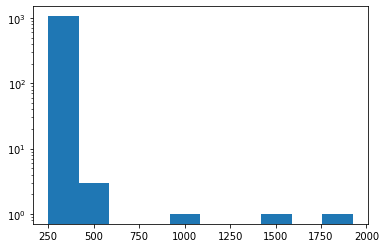

In [53]:
import matplotlib.pyplot as plt

plt.hist([len(x) for x in db_v4_revised.db["16s_sequence"]], bins=10, log=True)

In [70]:
species_merged = pd.merge(db_v4_revised.db, genome_names, left_on="genome", right_on="genome_id")

In [73]:
species_merged

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5,genome_id,genome.species
0,575540.3,2,NC_014962,fig|575540.3.rna.55,5377423,202,5529304,gacgaaccgtgcaaacgttattcggaatcactgggcttaaagggcg...,3e9b4dabf08bb97e6306eede8de5266c,575540.3,Isosphaera pallida
1,575540.3,2,NC_014962,fig|575540.3.rna.46,4713338,202,5529304,gacgaaccgtgcaaacgttattcggaatcactgggcttaaagggcg...,3e9b4dabf08bb97e6306eede8de5266c,575540.3,Isosphaera pallida
2,575540.3,2,NC_014962,fig|575540.3.rna.38,4041636,202,5529304,gacgaaccgtgcaaacgttattcggaatcactgggcttaaagggcg...,9c013e6a4352c1a8d4511f123499d059,575540.3,Isosphaera pallida
3,546269.5,1,CP002390,fig|546269.5.rna.10,719673,88,1931012,tacgtagggggcaagcgttatccggaataactgggcgtaaagggtg...,f36609047426c6be2cf593aa66bb1756,546269.5,Filifactor alocis
4,546269.5,1,CP002390,fig|546269.5.rna.33,764888,88,1931012,tacgtagggggcaagcgttatccggaataactgggcgtaaagggtg...,f36609047426c6be2cf593aa66bb1756,546269.5,Filifactor alocis
...,...,...,...,...,...,...,...,...,...,...,...
1061,471881.3,11,NZ_GG661996,fig|471881.3.rna.29,198505,124357,3749229,tacggagggtgcaagcgttaatcggaattactgggcgtaaagcgca...,e7030631a048a5e046fa7136a4c0e009,471881.3,Proteus penneri
1062,644284.3,1,NC_014218,fig|644284.3.rna.48,1610087,77,1986154,tacgtagggcgcgagcgttgtccggaattattggcgtaaagagctc...,deee8259adc969f3b917f145dcd1033d,644284.3,Arcanobacterium haemolyticum
1063,644284.3,1,NC_014218,fig|644284.3.rna.11,493763,77,1986154,tacgtagggcgcgagcgttgtccggaattattgggcgtaaagagct...,4c7d036c70ea6a081912ca79b4196b9d,644284.3,Arcanobacterium haemolyticum
1064,644284.3,1,NC_014218,fig|644284.3.rna.35,1073265,77,1986154,tacgtagggcgcgagcgttgtccggaattattgggcgtaaagagct...,4c7d036c70ea6a081912ca79b4196b9d,644284.3,Arcanobacterium haemolyticum


In [74]:
species = [
    "Salmonella enterica",
    "Streptococcus pyogenes",
    "Escherichia coli",
    "Lactobacillus helveticus",
    "Lactobacillus delbrueckii",
    "Lactobacillus plantarum",
    "Clostridium sordelli",
    "Bacteroides thetaiotaomicron",
    "Bacteroides vulgatus",
    "Bifidobacterium breve",
    "Bifidobacterium animalis",
]

for sp in species:
    print(sp)
    print(np.any(
        [x == sp for x in species_merged["genome.species"]]
    ))

Salmonella enterica
False
Streptococcus pyogenes
False
Escherichia coli
False
Lactobacillus helveticus
False
Lactobacillus delbrueckii
True
Lactobacillus plantarum
False
Clostridium sordelli
False
Bacteroides thetaiotaomicron
False
Bacteroides vulgatus
False
Bifidobacterium breve
False
Bifidobacterium animalis
False


In [77]:
species_merged[species_merged["genome.species"] == "Lactobacillus delbrueckii"]

# 9 RNAs matches rrnDB entry, at least

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5,genome_id,genome.species
42,390333.7,1,NC_008054,fig|390333.7.rna.77,1543353,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
43,390333.7,1,NC_008054,fig|390333.7.rna.111,1787116,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
44,390333.7,1,NC_008054,fig|390333.7.rna.108,1577010,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
45,390333.7,1,NC_008054,fig|390333.7.rna.20,689128,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
46,390333.7,1,NC_008054,fig|390333.7.rna.65,1470659,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
47,390333.7,1,NC_008054,fig|390333.7.rna.27,806385,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii
48,390333.7,1,NC_008054,fig|390333.7.rna.122,1794703,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,6abec7d3d493f954033da8097d590d1c,390333.7,Lactobacillus delbrueckii
49,390333.7,1,NC_008054,fig|390333.7.rna.3,45152,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,0866a5becffaf041436b6ff85354142b,390333.7,Lactobacillus delbrueckii
50,390333.7,1,NC_008054,fig|390333.7.rna.57,1359991,323,1864998,tacgtaggtggcaagcgttgtccggatttattgggcgtaaagcgag...,851e565cc5f4f6c408567d985007051c,390333.7,Lactobacillus delbrueckii


In [89]:
l_deb_seqs = species_merged[species_merged["genome.species"] == "Lactobacillus delbrueckii"]["16s_sequence"]
l_deb_seqs = list(l_deb_seqs)

for seq in l_deb_seqs:
    print(seq.upper())

TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAATGATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAACTGCATCGGAAACTGTCATTCTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTCTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAACAGG
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAATGATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAACTGCATCGGAAACTGTCATTCTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTCTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAACAGG
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAATGATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAACTGCATCGGAAACTGTCATTCTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTCTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAACAGG
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAATGATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAACTGCATCGGAAACTGTCATTCTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTCTCTGGTCTGCAACTGACGCTGAGGCTCGAAAGCA

In [97]:
from tqdm import tqdm

synth_reads = {}

last_line = ""
for line in tqdm(open("/home/phil/aptr/experiments/synthetic/aptr_c9d4a42d-f0b4-4cc4-9395-d92396836c8c/all.fasta")):
    if line.startswith(">"):
        last_line = line
    
    seq = line.strip().lower()

    elif np.any([x.__contains__(seq) or seq.__contains__(x) for x in l_deb_seqs]):
            synth_reads[line] = last_line.split(";size=")[1]
    
    elif np.any(line.rstrip().lower().__contains__(x) for x in l_deb_seqs):
        synth_reads[line] = last_line.split(";size=")[1]

print(synth_reads)

3902830it [00:34, 113207.82it/s]


In [87]:
l_deb_seqs.iloc[0] in list(l_deb_seqs)

True